#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [ ]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
marketing_data = pd.read_csv("marketing_data.csv")
# see all columns
pd.set_option('display.max_columns', None)
marketing_data.head()

import warnings
warnings.filterwarnings('ignore')

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA.
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [ ]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
# see what columns have missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [ ]:
# Clean Columns

#taking dollar sign out of values and convert to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
marketing_data['Income'].describe()

# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

<IPython.core.display.Javascript object>


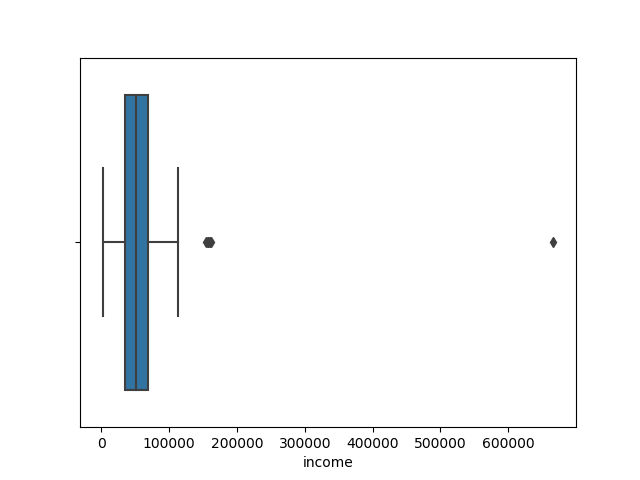

In [ ]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

This boxplot shows a major outlier on the right, so it is removed from the dataset.

<IPython.core.display.Javascript object>


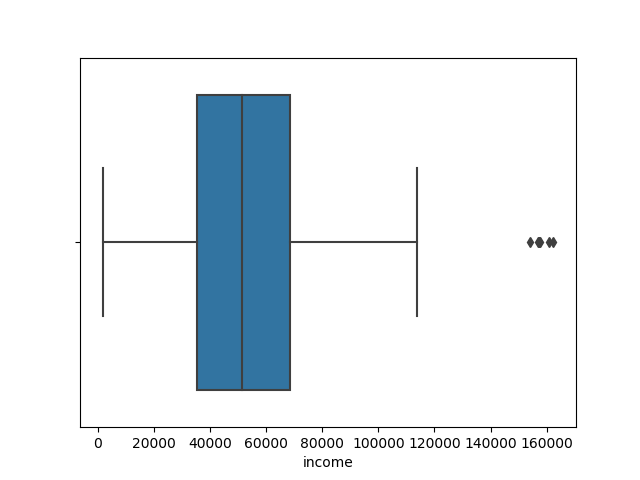

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [ ]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


marketing_data['income'].describe()

After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [ ]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from).
* Any outliers in `age` that could affect the analysis are removed.

In [ ]:
marketing_data['age'] = 2020 - marketing_data['year_birth']

<IPython.core.display.Javascript object>


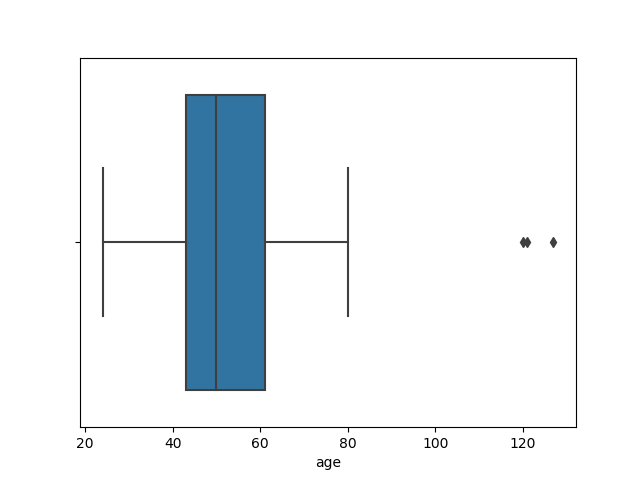

count    2215.000000
mean       51.183296
std        11.987000
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: age, dtype: float64

In [ ]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()